In [1]:
import tensorflow as tf
import pandas as pd
import math
import numpy as np
from tensorflow import keras
import os
import pathlib
import matplotlib.pyplot as plt


SHUFFLE_BUFFER = 500
BATCH_SIZE = 30
EPOCHS = 50
RUNS = 5

/Users/ushirraval/Workspace/cos711-a2/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('data/prepared_data.csv')

TRAINING_SIZE = math.floor(0.5*len(data))
TEST_SIZE = math.floor(0.3*len(data))
EVALUATION_SIZE = math.floor(0.2*len(data))

indices = (TRAINING_SIZE, TRAINING_SIZE+TEST_SIZE, TRAINING_SIZE+TEST_SIZE+EVALUATION_SIZE)
inputs = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']
outputs = ['class_GALAXY','class_QSO','class_STAR']

training = data[0:indices[0]]
test = data[indices[0]:indices[1]]
evaluation = data[indices[1]:indices[2]]
professor = {
	"training": {
		"questions": training[inputs],
		"answers": training[outputs]
	},
	"test": {
		"questions": test[inputs],
		"answers": test[outputs]
	},
	"evaluation": {
		"questions": evaluation[inputs],
		"answers": evaluation[outputs]
	}
}

2021-11-01 19:02:46.732817: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-01 19:02:46.795723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
167/167 [==============================] - 2s 5ms/step - loss: 0.6907 - accuracy: 0.5024 - val_loss: 0.6354 - val_accuracy: 0.6257
Epoch 2/50
167/167 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.5732 - val_loss: 0.6034 - val_accuracy: 0.6540
Epoch 3/50
167/167 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.6200 - val_loss: 0.5871 - val_accuracy: 0.6820
Epoch 4/50
167/167 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.6470 - val_loss: 0.5770 - val_accuracy: 0.6830
Epoch 5/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.6574 - val_loss: 0.5691 - val_accuracy: 0.6857
Epoch 6/50
167/167 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.6654 - val_loss: 0.5623 - val_accuracy: 0.6913
Epoch 7/50
167/167 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.6776 - val_loss: 0.5562 - val_accuracy: 0.7033
Epoch 

2021-11-01 19:03:04.737577: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./standard-nn/run-0/trainined-model-0.tf/assets
Epoch 1/50
167/167 [==============================] - 1s 5ms/step - loss: 0.7107 - accuracy: 0.4572 - val_loss: 0.6663 - val_accuracy: 0.5110
Epoch 2/50
167/167 [==============================] - 1s 4ms/step - loss: 0.6460 - accuracy: 0.6010 - val_loss: 0.6291 - val_accuracy: 0.5617
Epoch 3/50
167/167 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6294 - val_loss: 0.6089 - val_accuracy: 0.5713
Epoch 4/50
167/167 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.6464 - val_loss: 0.5950 - val_accuracy: 0.5970
Epoch 5/50
167/167 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.6568 - val_loss: 0.5843 - val_accuracy: 0.6203
Epoch 6/50
167/167 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.6724 - val_loss: 0.5753 - val_accuracy: 0.6450
Epoch 7/50
167/167 [==============================] - 0s 2ms/step

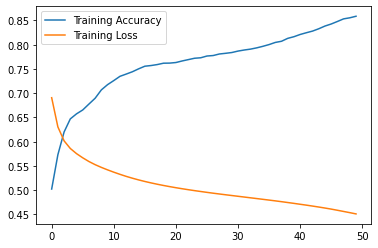

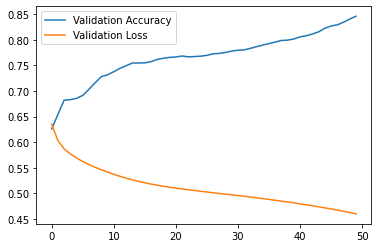

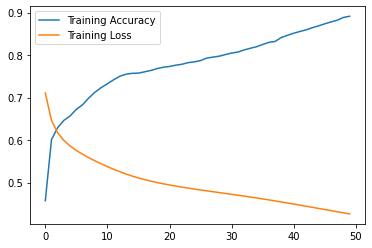

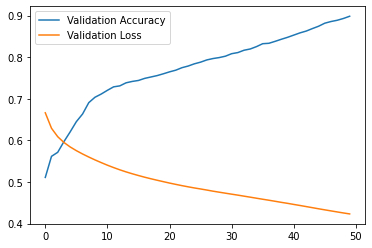

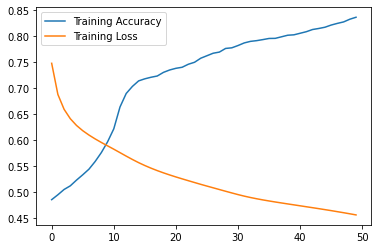

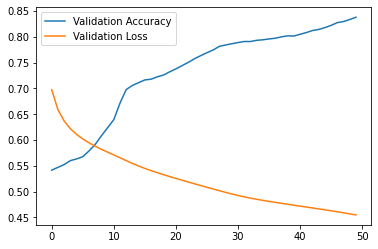

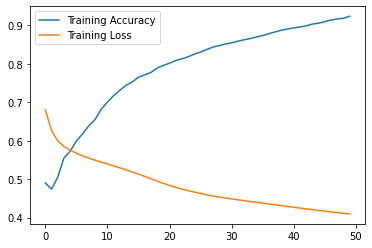

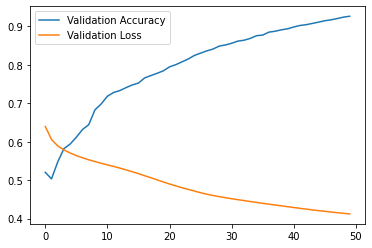

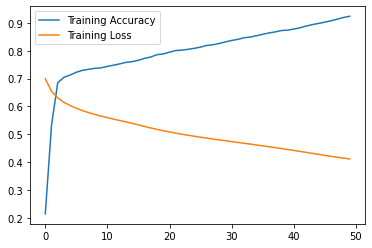

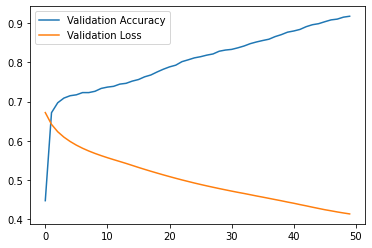

In [3]:
evaluations = []
histories = []
for i in range(0, RUNS):
	current_run_file = f'./standard-nn/run-{i}'
	if not os.path.isdir(current_run_file):
		path = pathlib.Path(current_run_file)
		path.mkdir(parents=True, exist_ok=True)
	normalizer = keras.layers.Normalization(axis=-1)
	normalizer.adapt(data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']])

	model = keras.Sequential([
		normalizer,
		keras.layers.Dense(9, activation='relu'),
		keras.layers.Dense(9, activation='relu'),
		keras.layers.Dense(3, activation='sigmoid')
	])

	model.compile(
		optimizer='sgd',
		loss=keras.losses.BinaryCrossentropy(),
		metrics=['accuracy']
	)

	history = model.fit(professor['training']['questions'], professor['training']['answers'], validation_data=(professor['test']['questions'], professor['test']['answers']), epochs=EPOCHS, batch_size=BATCH_SIZE)
	evaluation_score = model.evaluate(professor["evaluation"]["questions"], professor['evaluation']['answers'])

	### Training Performance
	epochs_range = range(EPOCHS)
	plt.figure()
	plt.plot(epochs_range, history.history["accuracy"], label='Training Accuracy')
	plt.plot(epochs_range, history.history["loss"], label='Training Loss')
	plt.legend()
	plt.savefig(current_run_file+"/training-perf.png")

	### Valuation Performance
	plt.figure()
	plt.plot(epochs_range, history.history["val_accuracy"], label='Validation Accuracy')
	plt.plot(epochs_range, history.history["val_loss"], label='Validation Loss')
	plt.legend()
	plt.savefig(current_run_file+"/validation-perf.png")

	### Training vs Validation Accuracy
	plt.figure()
	plt.plot(epochs_range, history.history["accuracy"], label='Training Accuracy')
	plt.plot(epochs_range, history.history["val_accuracy"], label='Validation Accuracy')
	plt.legend()
	plt.savefig(current_run_file+"/training-vs-validation-acc.png")


	plt.close()

	model.save(filepath=f"{current_run_file}/trainined-model-{i}.tf")
	histories.append(history)
	evaluations.append(evaluation_score)

In [4]:
accuracies = np.average(np.array([h.history['accuracy'] for h in histories]), axis=0)
val_accuracies = np.average(np.array([h.history['val_accuracy'] for h in histories]), axis=0)
accuracies_stds = [np.std(h.history['accuracy']) for h in histories]
val_accuracies_stds = [np.std(h.history['val_accuracy']) for h in histories]

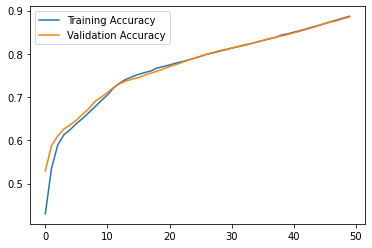

In [5]:
epochs_range = range(EPOCHS)
plt.figure()
plt.plot(epochs_range, accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.legend()
plt.savefig("standard-nn/mean-accuracy.png")

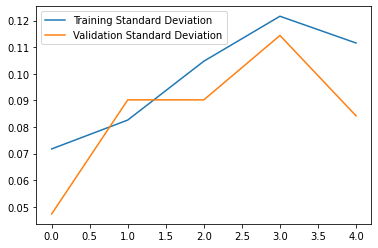

In [6]:
runs_range = range(RUNS)
plt.figure()
plt.plot(runs_range, accuracies_stds, label='Training Standard Deviation')
plt.plot(runs_range, val_accuracies_stds, label='Validation Standard Deviation')
plt.legend()
plt.savefig("standard-nn/mean-std.png")

In [7]:
accuracies = np.array([e[1] for e in evaluations])
losses = np.array([e[0] for e in evaluations])
accuracies_stds = [np.std([e[1] for e in evaluations]) for h in histories]
losses_stds = [np.std([e[0] for e in evaluations]) for h in histories]

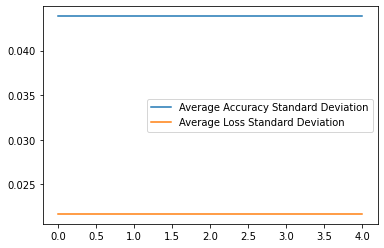

In [8]:
runs_range = range(RUNS)
plt.figure()
plt.plot(runs_range, accuracies_stds, label='Average Accuracy Standard Deviation')
plt.plot(runs_range, losses_stds, label='Average Loss Standard Deviation')
plt.legend()
plt.savefig("standard-nn/eval-mean-std.png")

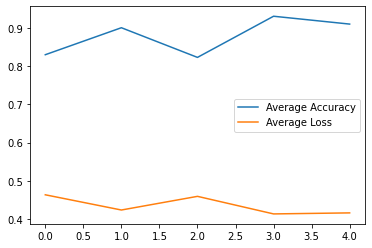

In [9]:
runs_range = range(RUNS)
plt.figure()
plt.plot(runs_range, accuracies, label='Average Accuracy')
plt.plot(runs_range, losses, label='Average Loss')
plt.legend()
plt.savefig("standard-nn/eval-mean-performace.png")